# Anomaly Detection in Practice

In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

np.random.seed(42)

# import the outlier detection toolkit
# install it with 
# ! pip install --upgrade pyod 
import pyod


Counter({0: 7500, 1: 2500})


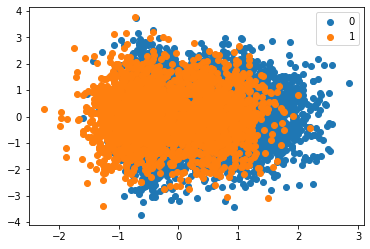

In [2]:
# create an imbalaced toy dataset with 10000 samples and 10 features
# class 0: 7500 samples, class 1: 2500 samples 
X, y = make_classification(n_samples=10000, weights=[0.75], n_features = 10,
                           flip_y=0, random_state=42)

# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [3]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(6700, 10) (6700,)
MAE: 0.094


# Histogram-based Outlier Detection (HBOS)
*(from pyod)*

In [4]:
from pyod.models.hbos import HBOS

contamination = 0.1
hbos = HBOS(contamination=contamination)

# fit the data to HBOS
hbos.fit(X_train)

y_hat = hbos.predict(X_train)

# filter out predictions values = 0
# as they are considered as anomalies
mask = y_hat != 0

out_hbos, in_hbos = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_hbos, in_hbos))

X_masked, y_masked = X_train[mask, :], y_train[mask]

model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_hbos = mean_absolute_error(y_test, y_pred)

print('MAE HBOS: {}'.format(mae_hbos))

Removed 6030 outliers, kept 670 inliers
MAE HBOS: 0.11303030303030304


# Density-Based Spatial Clustering of Applications with Noise(DBSCAN)
*(from sklearn)*

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=2, metric='cosine')

# fit the data to IF
y_hat = dbscan.fit_predict(X_train, y_train)

# filter out predictions values = -1 
# as they are considered as anomalies
mask = y_hat != -1

out_dbscan, in_dbscan = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_dbscan, in_dbscan))

X_masked, y_masked = X_train[mask], y_train[mask]

model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_dbscan = mean_absolute_error(y_test, y_pred)

print('MAE DBSCAN: {}'.format(mae_dbscan))


Removed 397 outliers, kept 6303 inliers
MAE DBSCAN: 0.09181818181818181


# One-Class Support Vector Machine (OCSVM)
*(from scikit-learn)*

In [6]:
from sklearn.svm import OneClassSVM as OCSVM

ocsvm = OCSVM(gamma='auto', kernel='rbf')


# fit the data to OCSVM
y_hat = ocsvm.fit_predict(X_train, y_train)

# filter out predictions values = -1 
# as they are considered as anomalies
mask = y_hat != -1

out_ocsvm, in_ocsvm = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_ocsvm, in_ocsvm))

X_masked, y_masked = X_train[mask], y_train[mask]


model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_ocsvm = mean_absolute_error(y_test, y_pred)

print('MAE OCSVM: {}'.format(mae_ocsvm))



Removed 3352 outliers, kept 3348 inliers
MAE OCSVM: 0.08878787878787879


# IsolationForest Outlier Detector 
*(from pyod also on scikit-learn)*

In [7]:
from pyod.models.iforest import IForest

random_state = np.random.RandomState(42)
contamination = 0.1
iso = IForest(contamination=contamination, random_state=random_state)

# fit the data to IF
iso.fit(X_train)

y_hat = iso.predict(X_train)

# filter out predictions values = 0
# as they are considered as anomalies
mask = y_hat != 0

out_iso, in_iso = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_iso, in_iso))


X_masked, y_masked = X_train[mask, :], y_train[mask]

model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_iso = mean_absolute_error(y_test, y_pred)

print('MAE iForest: {}'.format(mae_iso))

Removed 6030 outliers, kept 670 inliers
MAE iForest: 0.10363636363636364


# Local Outlier Factor (LOF) 
*(from pyod also on scikit-learn)*

In [8]:
from pyod.models.lof import LOF

contamination = 0.1
lof = LOF(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', contamination = contamination)

# fit the data to LOF
lof.fit(X_train)

y_hat = lof.predict(X_train)

# filter out predictions values = 0
# as they are considered as anomalies
mask = y_hat != 0

out_lof, in_lof = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_lof, in_lof))


X_masked, y_masked = X_train[mask, :], y_train[mask]

model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_lof = mean_absolute_error(y_test, y_pred)

print('MAE iForest: {}'.format(mae_lof))

Removed 6105 outliers, kept 595 inliers
MAE iForest: 0.10606060606060606


# Clustering Based Local Outlier Factor (CBLOF) 
*(from pyod)*

In [9]:
from pyod.models.cblof import CBLOF

random_state = np.random.RandomState(42)
contamination = 0.1
cblof = CBLOF(contamination=contamination, check_estimator=False, random_state=random_state)

# fit the data to CBLOF
cblof.fit(X_train)

y_hat = cblof.predict(X_train)

# filter out predictions values = 0
# as they are considered as anomalies
mask = y_hat != 0

out_cblof, in_cblof = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_cblof, in_cblof))


X_masked, y_masked = X_train[mask, :], y_train[mask]

model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_cblof = mean_absolute_error(y_test, y_pred)

print('MAE CBLOF: {}'.format(mae_cblof))

Removed 6030 outliers, kept 670 inliers
MAE CBLOF: 0.1003030303030303


# ABOD
*(from pyod)*

In [10]:
from pyod.models.abod import ABOD

contamination = 0.1
abod = ABOD(contamination=contamination)

# fit the data to ABOD
abod.fit(X_train)

y_hat = abod.predict(X_train)

# filter out predictions values = 0
# as they are considered as anomalies
mask = y_hat != 0

out_abod, in_abod = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_abod, in_abod))


X_masked, y_masked = X_train[mask, :], y_train[mask]

model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_abod = mean_absolute_error(y_test, y_pred)

print('MAE ABOD: {}'.format(mae_abod))

Removed 5841 outliers, kept 859 inliers
MAE ABOD: 0.10424242424242425


# Feaure Bagging 
*(from pyod)*

In [11]:
from pyod.models.feature_bagging import FeatureBagging

random_state = np.random.RandomState(42)
contamination = 0.1
fbd = FeatureBagging(LOF(n_neighbors=20),contamination=contamination,
                    check_estimator=False,random_state=random_state)

# fit the data to FB
fbd.fit(X_train)

y_hat = fbd.predict(X_train)

# filter out predictions values = 0
# as they are considered as anomalies
mask = y_hat != 0

out_fb, in_fb = Counter(mask)[0],Counter(mask)[1]

print('Removed {} outliers, kept {} inliers'.format(out_fb, in_fb))


X_masked, y_masked = X_train[mask, :], y_train[mask]

model = LogisticRegression()
# fit the model
model.fit(X_masked, y_masked)
# evaluate the model
y_pred = model.predict(X_test)
# evaluate predictions
mae_fb = mean_absolute_error(y_test, y_pred)

print('MAE Feature Bagging: {}'.format(mae_fb))

Removed 6122 outliers, kept 578 inliers
MAE Feature Bagging: 0.10818181818181818


# Summarize results

In [12]:
cols = ['Detector', 'Outliers', 'Inliers', 'MAE']

df = pd.DataFrame(columns=cols)

detectors = ['None', 'OCSVM', 'ABOD', 'CBLOF', 'DBSCAN', 'FB', 'IF', 'HBOS', 'LOF']

maes = [mae, mae_ocsvm, mae_abod, mae_cblof, mae_dbscan, mae_fb, mae_iso, mae_hbos, mae_lof]

inliers = [np.NaN, in_ocsvm, in_abod, in_cblof, in_dbscan, in_fb, in_iso, in_hbos, in_lof]

outliers = [np.NaN, out_ocsvm, out_abod, out_cblof, out_dbscan, out_fb, out_iso, out_hbos, out_lof]

df.Detector = detectors
df.Outliers = outliers
df.Inliers = inliers
df.MAE = maes


In [13]:
df

,Detector,Outliers,Inliers,MAE
0,None,NaN,NaN,0.093636
1,OCSVM,3352.0,3348.0,0.088788
2,ABOD,5841.0,859.0,0.104242
3,CBLOF,6030.0,670.0,0.100303
4,DBSCAN,397.0,6303.0,0.091818
5,FB,6122.0,578.0,0.108182
6,IF,6030.0,670.0,0.103636
7,HBOS,6030.0,670.0,0.113030
8,LOF,6105.0,595.0,0.106061
